In [16]:
library(ggplot2)
library(reshape2)

In [17]:
data=read.table("calcium.preds.summary.txt",header=TRUE,sep='\t')

In [18]:
head(data)

,SNP,colo205.ref,colo205.alt,colo205.alt.REF,dnase_c.ref,dnase_c.alt,dnase_c.alt.REF,dnase_v.ref,dnase_v.alt,dnase_v.alt.REF,hct116.ref,hct116.alt,hct116.alt.REF,sw480.ref,sw480.alt,sw480.alt.REF
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs479980,-1.773,-1.713,0.060,-1.609,-1.808,-0.199,-1.196,-1.577,-0.382,-1.481,-1.534,-0.053,-0.918,-0.976,-0.059
2,rs606101,-0.444,-0.268,0.177,0.047,0.506,0.459,-0.300,-0.105,0.195,-0.419,-0.309,0.111,-0.576,-0.665,-0.089
3,rs512375,0.235,0.322,0.087,0.253,0.267,0.014,-0.031,-0.323,-0.291,-0.038,0.061,0.099,1.084,0.948,-0.136
4,rs578384,-0.959,-0.777,0.183,-1.497,-1.282,0.215,-1.097,-0.921,0.176,-1.603,-1.853,-0.249,-1.198,-1.376,-0.178
5,rs638382,-1.566,-1.474,0.092,-1.122,-0.874,0.248,-1.039,-0.908,0.132,-1.234,-1.110,0.124,-1.430,-1.343,0.088
6,rs669759,-1.445,-1.268,0.178,-1.157,-0.921,0.236,-1.264,-1.041,0.223,-1.119,-0.888,0.231,-0.473,-0.604,-0.130


In [19]:
subset_data=subset(data,select=c('SNP','colo205.ref',
             'colo205.alt',
             'hct116.ref',
             'hct116.alt',
             'sw480.ref',
             'sw480.alt',
             'dnase_c.ref',
             'dnase_c.alt',
             'dnase_v.ref',
             'dnase_v.alt'))

In [20]:
m=melt(subset_data)

Using SNP as id variables



In [21]:
m

SNP,variable,value
<chr>,<fct>,<dbl>
rs479980,colo205.ref,-1.773
rs606101,colo205.ref,-0.444
rs512375,colo205.ref,0.235
rs578384,colo205.ref,-0.959
rs638382,colo205.ref,-1.566
rs669759,colo205.ref,-1.445
rs621341,colo205.ref,-1.309
rs520449,colo205.ref,-1.194
rs613828,colo205.ref,-0.330


In [22]:
library(dplyr)
library(tidyr)
m2=separate(data = m, col = variable, into = c("model", "allele"), sep = "\\.")


In [23]:
m3=dcast(m2, SNP + model~ allele)

In [24]:
head(m3)

,SNP,model,alt,ref
,<chr>,<chr>,<dbl>,<dbl>
1,rs1016120,colo205,-0.662,-0.473
2,rs1016120,dnase_c,-0.353,-0.073
3,rs1016120,dnase_v,-0.284,-0.041
4,rs1016120,hct116,0.014,0.285
5,rs1016120,sw480,-0.368,-0.094
6,rs10164986,colo205,-1.212,-1.095


In [30]:
m3$label=""
#lead snp
m3$label[m3$SNP=="rs62171444"]="2:135594399:A:C"
#alt is up 
m3$label[m3$SNP=="rs6430529"]="rs6430529"
m3$label[m3$SNP=="rs6722883"]="rs6722883"
#m3$label[m3$SNP=="rs11891384"]="rs11891384"
#m3$label[m3$SNP=="rs62168872"]="rs62168872"
#m3$label[m3$SNP=="rs1942050"]="rs1942050"
#ref is up 
m3$label[m3$SNP=="rs7599054"]="rs7599054"
m3$label[m3$SNP=="rs11903701"]="rs11903701"
#m3$label[m3$SNP=="rs11884708"]="rs11884708"
#m3$label[m3$SNP=="rs4430991"]="rs4430991"
#m3$label[m3$SNP=="rs6759811"]="rs6759811"



In [31]:
head(m3)

,SNP,model,alt,ref,label
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,rs1016120,colo205,-0.662,-0.473,
2,rs1016120,dnase_c,-0.353,-0.073,
3,rs1016120,dnase_v,-0.284,-0.041,
4,rs1016120,hct116,0.014,0.285,
5,rs1016120,sw480,-0.368,-0.094,
6,rs10164986,colo205,-1.212,-1.095,


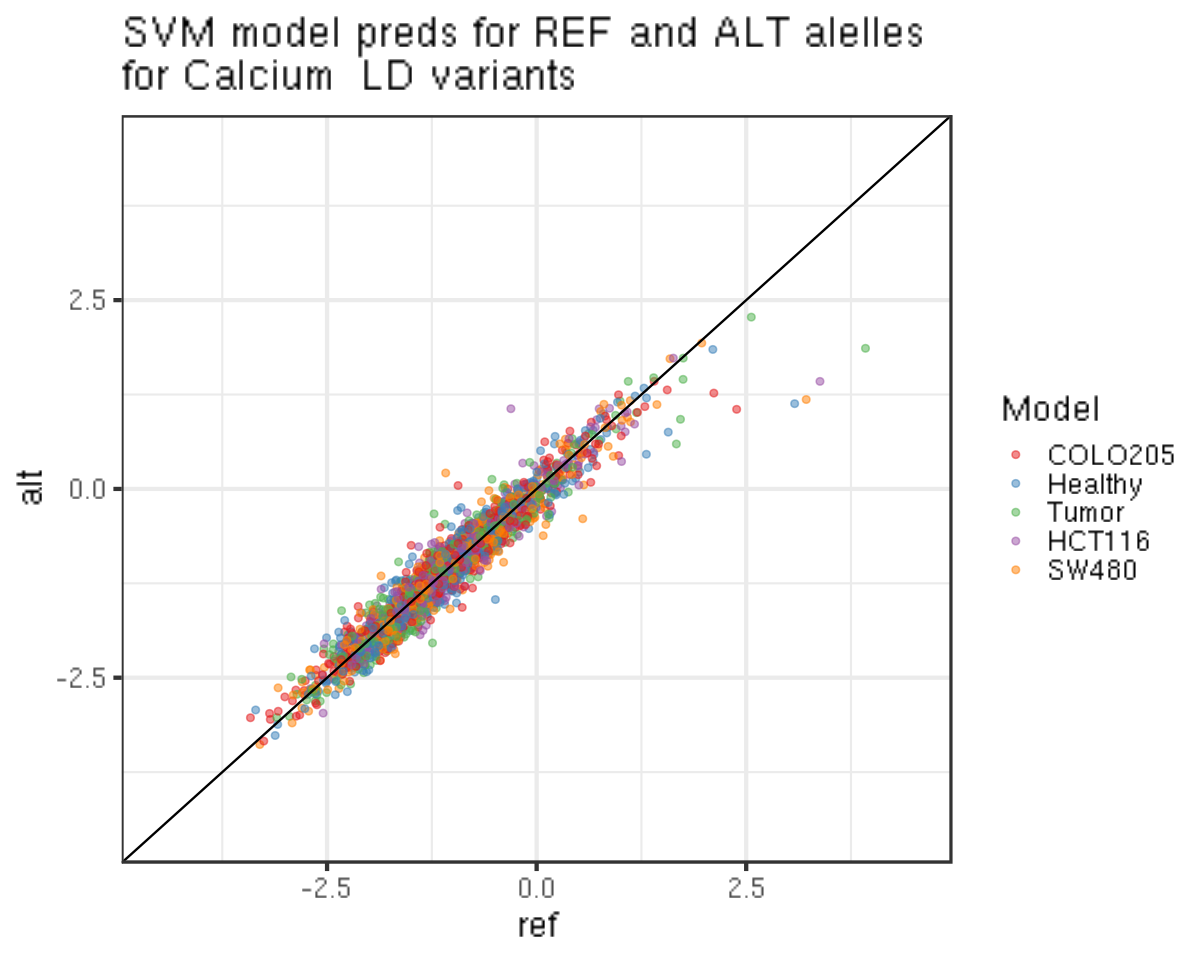

In [37]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=m3,
      aes(x=ref,
         y=alt,
         group=model,
         color=model))+
geom_point(alpha=0.5)+
geom_abline()+
xlim(-4.5,4.5)+
ylim(-4.5,4.5)+
theme_bw(20)+
ggtitle("SVM model preds for REF and ALT alelles\nfor Calcium  LD variants")+
scale_color_manual(name='Model',values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'),labels=c("COLO205","Healthy","Tumor","HCT116","SW480"))

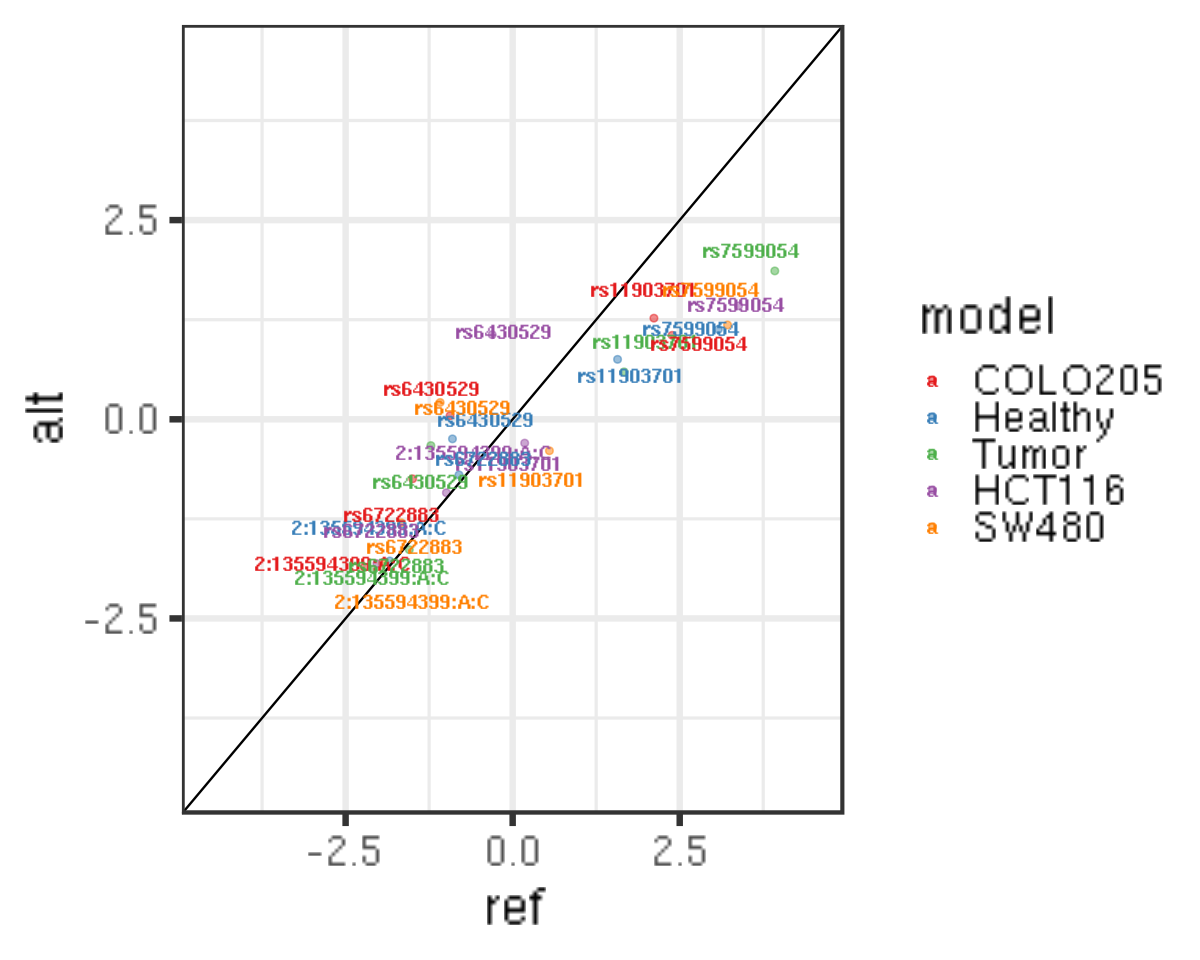

In [35]:
m4=m3[m3$label!="",]
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=m4,
      aes(x=ref,
         y=alt,
         group=model,
         color=model,
         label=label))+
geom_point(alpha=0.5)+
geom_abline()+
geom_text(fontface = "bold",position=position_jitter(width=.5,height=.5))+
xlim(-4.5,4.5)+
ylim(-4.5,4.5)+
theme_bw(30)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'),
                   labels=c("COLO205","Healthy","Tumor","HCT116","SW480"))